In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [339]:
import cv2
import numpy as np
from copy_paste import CopyPaste
from coco import CocoDetectionCP
from visualize import display_instances
import albumentations as A
import random
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import os

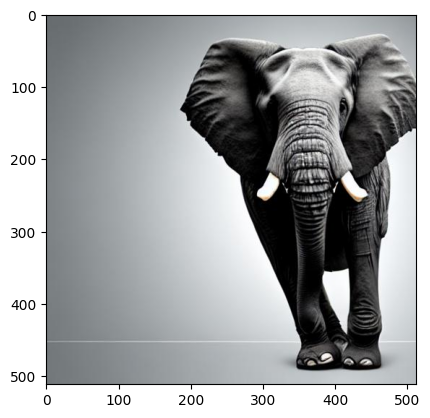

In [340]:
# which ones work? 2, 3, 4, 5, kinda 6, 7, 8, 10, 11, 12, 13, 15
# some elephantisimos: step_0_image_0, step_1_image_5 #actually works better than expected
path = "step_1_image_5.jpg"
Root = '../../data/coco_minitrain_25k/images_pruned/giraffes_elephants/elephant'

image = cv2.imread(os.path.join(Root, path))
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.show()

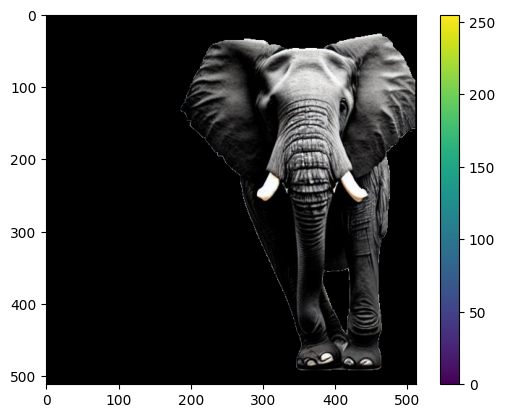

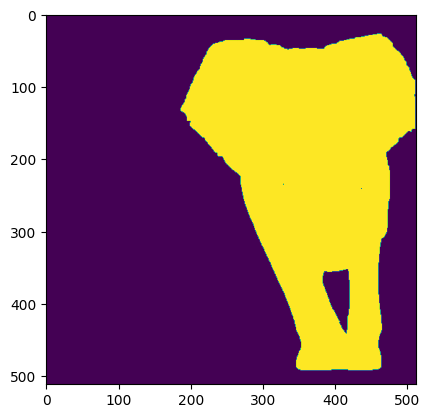

In [341]:
### from here: https://www.geeksforgeeks.org/python-foreground-extraction-in-an-image-using-grabcut-algorithm/

# Python program to illustrate  
# foreground extraction using 
# GrabCut algorithm 
   
# path to input image specified and  
# image is loaded with imread command 
image = image2.copy()
   
# create a simple mask image similar 
# to the loaded image, with the  
# shape and return type 
mask = np.zeros(image.shape[:2], np.uint8) 
   
# specify the background and foreground model 
# using numpy the array is constructed of 1 row 
# and 65 columns, and all array elements are 0 
# Data type for the array is np.float64 (default) 
backgroundModel = np.zeros((1, 65), np.float64) 
foregroundModel = np.zeros((1, 65), np.float64) 
   
# define the Region of Interest (ROI) 
# as the coordinates of the rectangle 
# where the values are entered as 
# (startingPoint_x, startingPoint_y, width, height) 
# these coordinates are according to the input image 
# it may vary for different images 
w, h = np.shape(image)[0], np.shape(image)[1]

rectangle = (0, 0, w-1, h-1) 
   
# apply the grabcut algorithm with appropriate 
# values as parameters, number of iterations = 3  
# cv2.GC_INIT_WITH_RECT is used because 
# of the rectangle mode is used  
cv2.grabCut(image, mask, rectangle,   
            backgroundModel, foregroundModel, 
            5, cv2.GC_INIT_WITH_RECT) #iteration number seems to be an important parameter
   
# In the new mask image, pixels will  
# be marked with four flags  
# four flags denote the background / foreground  
# mask is changed, all the 0 and 2 pixels  
# are converted to the background 
# mask is changed, all the 1 and 3 pixels 
# are now the part of the foreground 
# the return type is also mentioned, 
# this gives us the final mask 
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 
   
# The final mask is multiplied with  
# the input image to give the segmented image. 
image = image * mask2[:, :, np.newaxis] 
   
# output segmented image with colorbar 
plt.imshow(image) 
plt.colorbar() 
plt.show() 

plt.imshow(mask2)
plt.show()

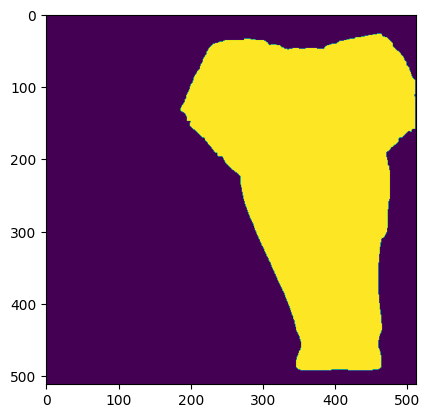

In [342]:
mask_inv = cv2.bitwise_not(mask2)

# find the largest contour 
contours, _ = cv2.findContours(mask2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = sorted(contours, key=cv2.contourArea, reverse=True)[0]

# draw the largest contour to fill in the holes in the mask
final_result = np.ones(image.shape[:2]) # create a blank canvas to draw the final result
final_result = cv2.drawContours(final_result, [largest_contour], -1, color=(0, 255, 0), thickness=cv2.FILLED)

# show results
final_mask = final_result.astype('uint8')
final_mask = np.logical_not(final_mask).astype('uint8')
plt.imshow(final_mask)
plt.show()

In [343]:
np.unique(final_mask)

array([0, 1], dtype=uint8)

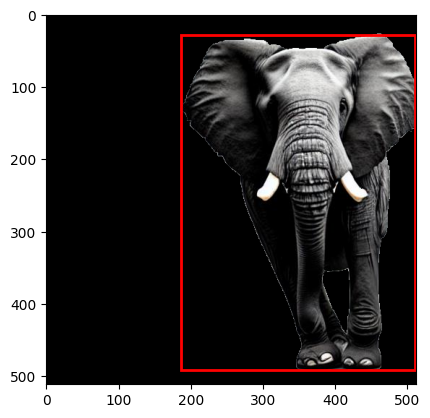

In [344]:
# Get the bbox (xmin, ymin, width, height)
bbox = 0, 0, 0, 0
segmentation = np.where(final_mask == 1)

if len(segmentation) != 0 and len(segmentation[1]) != 0 and len(segmentation[0]) != 0:
    x_min = int(np.min(segmentation[1]))
    x_max = int(np.max(segmentation[1]))
    y_min = int(np.min(segmentation[0]))
    y_max = int(np.max(segmentation[0]))

    bbox = x_min, y_min, x_max-x_min, y_max-y_min, 22


plt.imshow(image)
# plt.scatter([bbox[0],bbox[0],bbox[0]+bbox[2],bbox[0]+bbox[2]],[bbox[1],bbox[1]+bbox[3],bbox[1],bbox[1]+bbox[3]],color='red')
# plt.add_patch(patches.Rectangle(bbox[:2],bbox[2], bbox[3]))
plt.gca().add_patch(Rectangle(bbox[:2],bbox[2],bbox[3],
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
plt.show()

In [345]:
elephant_dict = {}
elephant_dict[path] = {}
elephant_dict[path]['bbox'] = bbox
elephant_dict[path]['mask'] = final_mask

with open('../../data/coco_minitrain_25k/annotations/elephant_annotations.pickle', 'wb') as handle:
    pickle.dump(elephant_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [346]:
os.getcwd()

'C:\\Users\\Andreas\\Documents\\DTU filer\\0 Specialkursus - DL & CV\\Exercises\\project\\src\\copy-paste'

In [347]:
with open('../../data/coco_minitrain_25k/annotations/elephant_annotations.pickle', 'rb') as handle:
    ele_anno = pickle.load(handle)

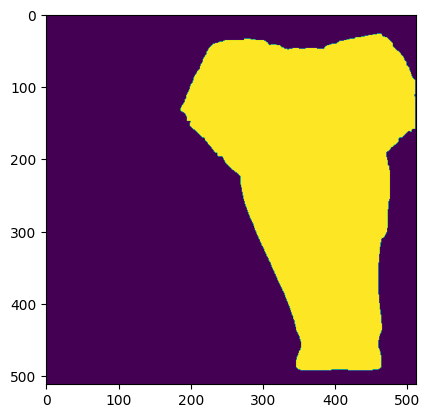

(186, 27, 324, 465, 22)

In [348]:
plt.imshow(ele_anno[path]['mask'])
plt.show()

ele_anno[path]['bbox']

In [385]:
pasteAnnotRoot = '../../data/coco_minitrain_25k/annotations/elephant_annotations.pickle'

with open(pasteAnnotRoot, 'rb') as handle:
    ele_anno = pickle.load(handle)

In [371]:
path = np.random.choice(list(ele_anno.keys()))
path

'../../data/coco_minitrain_25k/images_pruned/giraffes_elephants/elephant\\step_12_image_0.jpg'

In [387]:
len(ele_anno.keys())

208